In [1]:
import tensorflow as tf
import numpy as np

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
tf.enable_eager_execution()

In [3]:
execfile("definitions.py")

In [7]:
RT = RayTracer()

train_batch_size = 2
num_features = 192

sk_gen = SRC_KAPPA_Generator(train_batch_size=train_batch_size,test_batch_size=train_batch_size,num_src_side=num_features,num_kappa_side=num_features)
lens_util_obj = lens_util(numpix_side = num_features)

checkpoint_path = "checkpoints/model_RT"
RT.load_weights(checkpoint_path)

In [8]:
sk_gen.draw_k_s("train")
tf_kappa  = tf.identity(sk_gen.Kappa_tr[:,:,:,:] )
_ , _ , x_a_labels , y_a_labels = lens_util_obj.get_deflection_angles(tf_kappa)

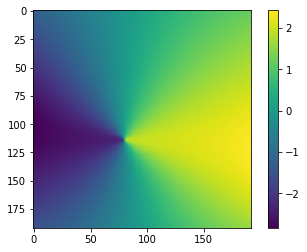

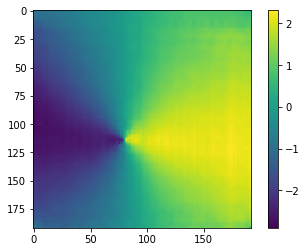

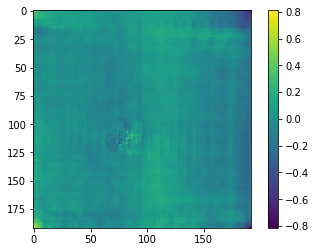

In [9]:
# _ , _ , x_a_labels , _ = lens_util_obj.get_deflection_angles(tf_kappa)
x_a = RT(tf_kappa)

i_example = 0
plt.imshow( x_a_labels[i_example,:,:,0])
plt.colorbar()
plt.figure()
plt.imshow(x_a[i_example,:,:,0])
plt.colorbar()
plt.figure()
plt.imshow(x_a[i_example,:,:,0]-x_a_labels[i_example,:,:,0])
plt.colorbar()



In [50]:
import time 

In [106]:
start_time = time.time()
_ , _ , x_a_labels , _ = lens_util_obj.get_deflection_angles(tf_kappa)
elapsed_time = time.time() - start_time
print elapsed_time

start_time = time.time()
x_a = RT(tf_kappa)
elapsed_time = time.time() - start_time
print elapsed_time

5.14683198929
0.102532863617


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import scipy.io

tf.enable_eager_execution()

npix_side = 192
input_filename = '/mnt/home/yhezaveh/Censai/_matlab/data/old/KAP_001.mat'

mat_contents = scipy.io.loadmat(input_filename)
kappa = mat_contents['KAP']
kappa = np.moveaxis( kappa , 2 , 0)

/cm/shared/sw/pkg-old/devel/python2/2.7.13/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from skimage.transform import resize

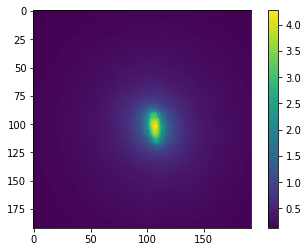

In [8]:
K = kappa[0]
plt.imshow(K)
plt.colorbar()

In [12]:
K.shape

(192, 192)

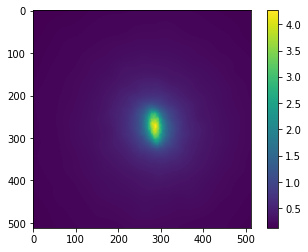

In [9]:
out = resize(K, (512,512), order=1, preserve_range=True)
plt.imshow(out)
plt.colorbar()

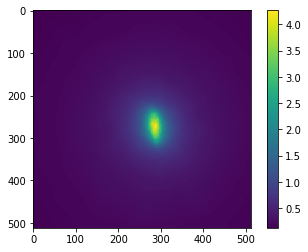

In [14]:
lrim = tf.identity(K.reshape(1,192,192,1))
plt.imshow( tf.image.resize_images(lrim,(512,512),preserve_aspect_ratio=True,align_corners=True).numpy().reshape(-1,512) )
plt.colorbar()

In [4]:
import sys

for line in sys.path:
     print line


/cm/shared/sw/pkg-old/devel/python2/2.7.13/lib/python27.zip
/cm/shared/sw/pkg-old/devel/python2/2.7.13/lib/python2.7
/cm/shared/sw/pkg-old/devel/python2/2.7.13/lib/python2.7/plat-linux2
/cm/shared/sw/pkg-old/devel/python2/2.7.13/lib/python2.7/lib-tk
/cm/shared/sw/pkg-old/devel/python2/2.7.13/lib/python2.7/lib-old
/cm/shared/sw/pkg-old/devel/python2/2.7.13/lib/python2.7/lib-dynload
/cm/shared/sw/pkg-old/devel/python2/2.7.13/lib/python2.7/site-packages
/cm/shared/sw/pkg-old/devel/python2/2.7.13/lib/python2.7/site-packages/IPython/extensions
/mnt/home/yhezaveh/.ipython


In [ ]:
import sys
sys.path.append("/path/to/your/module")

In [6]:
import os
print(os.environ['PATH'])

/cm/shared/sw/pkg-old/devel/python2/2.7.13/bin:/usr/bin


In [1]:
import sys
sys.path = ['', '/cm/shared/sw/pkg-old/devel/python2/2.7.13/bin',
 '/mnt/xfs1/flatiron-sw/pkg/devel/python2/2.7.13/lib/python27.zip',
 '/mnt/xfs1/flatiron-sw/pkg/devel/python2/2.7.13/lib/python2.7',
 '/mnt/xfs1/flatiron-sw/pkg/devel/python2/2.7.13/lib/python2.7/plat-linux2',
 '/mnt/xfs1/flatiron-sw/pkg/devel/python2/2.7.13/lib/python2.7/lib-tk',
 '/mnt/xfs1/flatiron-sw/pkg/devel/python2/2.7.13/lib/python2.7/lib-old',
 '/mnt/xfs1/flatiron-sw/pkg/devel/python2/2.7.13/lib/python2.7/lib-dynload',
 '/mnt/home/yhezaveh/.local/lib/python2.7/site-packages',
 '/mnt/xfs1/flatiron-sw/pkg/devel/python2/2.7.13/lib/python2.7/site-packages',
 '/mnt/xfs1/flatiron-sw/pkg/devel/python2/2.7.13/lib/python2.7/site-packages/IPython/extensions',
 '/mnt/home/yhezaveh/.ipython']

In [3]:
execfile("train_ray_tracer.py")

Using TensorFlow backend.


(0, 2.5464473)
(1, 0.12657386)
(2, 1.2925867)
(3, 1.449821)


KeyboardInterrupt: 

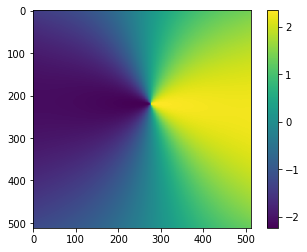

In [15]:
plt.imshow(x_a_labels[0].numpy().reshape(512,512))
plt.colorbar()

In [13]:
x_a_labels.shape

TensorShape([Dimension(1), Dimension(512), Dimension(512), Dimension(1)])

In [18]:
alpha = RT(tf_kappa)
alpha.shape

TensorShape([Dimension(1), Dimension(512), Dimension(512), Dimension(2)])

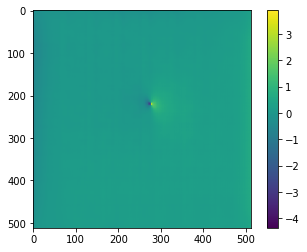

In [21]:
plt.imshow(alpha[0,:,:,0].numpy().reshape(512,512))
plt.colorbar()